# Coding project - Tumour segmentation

By Alexandre Achten - 000494484

December 2023

## Initialisation

(218, 180)


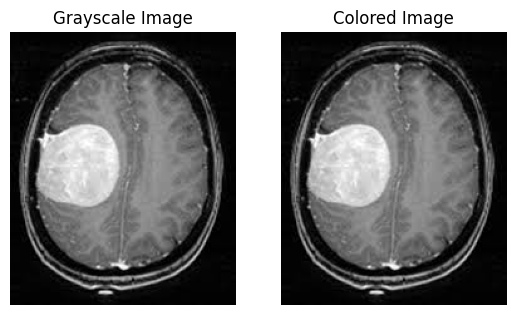

In [123]:
from skimage.io import imread,imshow
import matplotlib.pyplot as plt
from skimage.feature import canny
from skimage.filters import sobel
import numpy as np
import skimage.filters.rank as skr
from skimage.segmentation import mark_boundaries, watershed
from skimage.morphology import disk, opening, closing
from skimage.measure import label, regionprops,find_contours
import scipy.ndimage as ndi
%matplotlib inline

im = imread('mri_brain.jpg',as_gray=True) #read the image as grayscale for easier processing
im_color = imread('mri_brain.jpg') #read the image in color for later use
plt.figure()
plt.subplot(1,2,1)
plt.title('Grayscale Image')
plt.imshow(im,cmap='gray')
print(im.shape)
plt.axis('off')
plt.subplot(1,2,2)
plt.title("Colored Image")
plt.imshow(im_color)
plt.axis('off')
plt.show()

Trying doing the histogram based segmentation.

Maximal threshold method :

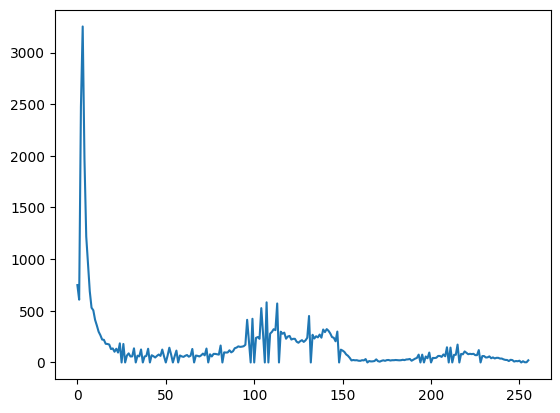

45.53021449079547 168.3991696938246 106
29.572250983640505 149.48168267638292 89
17.445646347999805 139.57423732435754 78
14.00584495488105 136.66791649777056 75
13.29838207840697 135.99929845660452 74
13.29838207840697 135.99929845660452 74
74


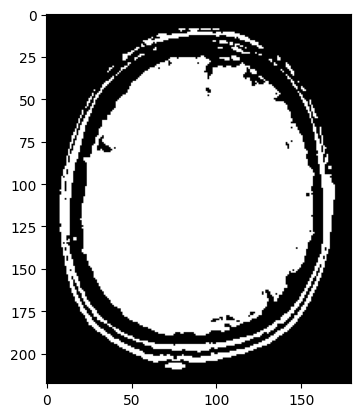

In [124]:
def make_histogram(im):
    ''' Make an histogram of the image im'''
    im = (im*255).astype(int)
    h = np.zeros(256) #initialize the histogram
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            h[im[i,j]] += 1 #add 1 to the corresponding bin
    return h

def optimal_threshold(h,t):
    ''' Find the optimal threshold in an histogram h from an initial threshold t'''
    # Cut distribution in 2
    g1 = h[:t]
    g2 = h[t:]
    # Compute the centroids of the two distributions
    m1 = (g1*np.arange(0,t)).sum()/g1.sum()
    m2 = (g2*np.arange(t,len(h))).sum()/g2.sum()
    # Compute the new threshold
    t2 = int((m1+m2)/2) #round to the nearest integer
    print(m1,m2,t2)
    
    if( t2 != t ) : return optimal_threshold(h,t2) #recursive call if not the same threshold
    return t2

hist = make_histogram(im)
plt.plot(hist)
plt.show()
im = (im*255).astype(int)
optimal_treshold = optimal_threshold(hist,128)
print(optimal_treshold)
im_bin = (im>optimal_treshold).astype(int) #mask segmented by treshold
plt.imshow(im_bin,cmap=plt.cm.gray)



Now trying with the canny filter method :

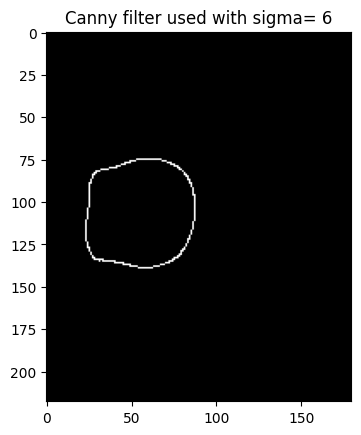

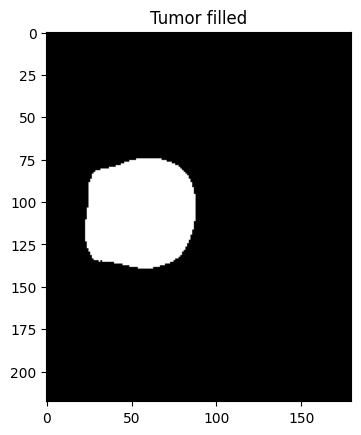

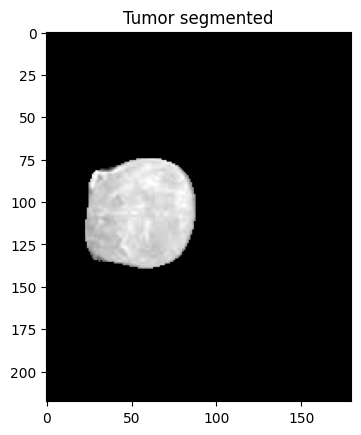

In [125]:
im = imread('mri_brain.jpg',as_gray=True)
sigma_val = 6
im_canny = canny(im, sigma=sigma_val)
plt.imshow(im_canny,cmap=plt.cm.gray) #try the sobel filter
plt.title('Canny filter used with sigma= '+str(sigma_val))
plt.show()

im_filled = ndi.binary_fill_holes(im_canny) #fill the holes
plt.imshow(im_filled,cmap=plt.cm.gray)
plt.title('Tumor filled')
plt.show()

im_segmented = im*im_filled #segment the image
plt.imshow(im_segmented,cmap=plt.cm.gray)
plt.title('Tumor segmented')
plt.show()


Given that the resolution of the image is of 0.115 cm/px in both axis, we can calculate the area of the tumor by counting the number of pixels.

In [126]:
label_image = label(im_filled) #label the tumor region
tumor = regionprops(label_image)
tumor_area = tumor[0]["area"]

print("Number of pixel in the tumor: ",tumor_area)
print("Tumor area: ",tumor_area*0.115,"cm^2")

Number of pixel in the tumor:  3558.0
Tumor area:  409.17 cm^2
